In [63]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [166]:
# df1 = pd.read_json('bucket1.json', lines = True)

In [167]:
# df2 = pd.read_json('bucket2.json', lines = True)

In [168]:
# df3 = pd.read_json('bucket3.json', lines = True)

In [169]:
# df1 = pd.read_json('bucket1.json', lines = True)
# df2 = pd.read_json('bucket2.json', lines = True)
# df3 = pd.read_json('bucket3.json', lines = True)
# df4 = pd.read_json('bucket4.json', lines = True)
# df5 = pd.read_json('bucket5.json', lines = True)

In [170]:
# df5 = pd.read_json('bucket5.json', lines = True)

In [171]:
# frames = [df1a, df2a, df3a]

# result = pd.concat(frames)

In [50]:
# f = df1.copy()
# s = df2.copy()
# t = df3.copy()
# fo = df4.copy()
# fi = df5.copy()

# cols = [f,s,t,fo,fi]

# comments_df = pd.concat(cols)


In [2]:
df = pd.read_csv('/home/heather/galvanize/Capstone2/fulldata.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(1101124, axis = 0, inplace = True)

In [4]:
# pd.to_datetime(df['created_at'][0]).date()

In [5]:
df['created'] = [pd.to_datetime(dt).date() for dt in df['created_at']]
# df['hour'] = [pd.to_datetime(dt).hour for dt in df['created_at']]


In [9]:
df.rating = (df.rating == 'approved')*1
df.parent_id = (~df.parent_id.isna())*1

In [31]:
# df.to_csv('../cleaned_comments.csv', index = False)

In [32]:
sample_df= df.sample(frac=1/15, random_state=1)


In [36]:
sample_df.drop('created_at', axis = 1, inplace = True)

In [44]:
# sample_df.to_csv('../sample_df.csv', index = False)

In [47]:
sample_df.rating.value_counts()
8228/112193

0.07333790878218784

In [ ]:
# delete any line that doesnt have a label...something that no one has commented on
# or ID types of comments that no one engages with
# divide the data up into four separate datasets....one dataset where each article has at least one...then make a multilabel predictor
# cluster the information that people find funny and like...funny and sad...wow and sad
# refression or classification? how many likes or is it likely to get any likes at all

In [7]:
#drop all values that have no funny,wow,sad...
# sentiment_array = comments_df[['funny', 'wow', 'sad', 'disagree', 'likes']]
# cleaned_df = comments_df.loc[~(sentiment_array==0).all(axis=1)].reset_index()

In [45]:
# new_s_df = cleaned_df[['funny', 'wow', 'sad', 'disagree', 'likes']]

# idx_non_zero = []
# for i in new_s_df[:10].values:
#     if sum(i) != 0:
#         idx_non_zero.append(i)


In [42]:
comments_df.head()


,Unnamed: 0,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,0,haha you guys are a bunch of losers.,2,0,2006,59856,0,0,1,0.0,2015-09-29,10
1,1,0,0,How can the author claim that Star Wars is bet...,22,1,59527,282338,0,0,1,0.0,2015-09-29,16
2,2,0,0,I agree 100% with everything here. Bruce Campb...,111,1,32846,240372,0,0,1,0.0,2015-09-29,16
3,3,0,0,"While I disagree about ""The Phantom Menace,"" t...",111,1,32846,240387,0,0,1,0.0,2015-09-29,16
4,4,0,0,"I agree, but only 99%.",111,1,32846,240373,0,0,1,1.0,2015-09-29,16


In [5]:
comments_df[comments_df.text.isna()]

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time


In [14]:
# comments_df.drop(index = 736029, axis = 0, inplace = True)

In [7]:
# ordered = comments_df.sort_values(by='created_at')

In [8]:
# pd.to_datetime(ordered.created_at[0])

In [48]:
# ordered['created'] = [pd.to_datetime(dt).date() for dt in ordered['created_at']]


KeyboardInterrupt: 

In [9]:
# ordered['created'] = [dt.date() for dt in ordered['created']]

In [11]:
comments_df.tail(1)

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
1223657,0,0,Secrecy is an internal component of the TPP. E...,54,approved,399437,6333090,0,0,1,6331916.0,2017-11-10,22


In [104]:
# tot = ordered.groupby('created').sum()

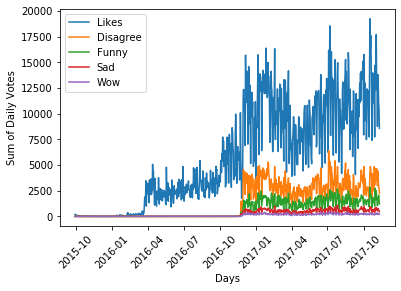

In [105]:
plt.plot(tot.likes, label = 'Likes')
plt.plot(tot.disagree, label = 'Disagree')
plt.plot(tot.funny, label = 'Funny')
plt.plot(tot.sad, label = 'Sad')
plt.plot(tot.wow, label = 'Wow')
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Sum of Daily Votes')
plt.legend()
# plt.savefig('ratings_per_day')
# around February of 2016 we have our first instances of ratings other than likes

In [47]:
# tot2 = ordered.groupby('created').count()
#for each day...comments got lots of the likes that were available...daily popularity...ratio of likes available
np.median(comments_df.likes)

2.0

(array([7.07804e+05, 2.89738e+05, 1.08843e+05, 4.92210e+04, 2.52950e+04,
        1.45040e+04, 8.66100e+03, 5.64900e+03, 3.68200e+03, 2.52500e+03,
        1.82300e+03, 1.29400e+03, 9.40000e+02, 6.72000e+02, 5.56000e+02,
        4.21000e+02, 3.44000e+02, 2.53000e+02, 2.20000e+02, 2.05000e+02,
        1.28000e+02, 1.30000e+02, 1.14000e+02, 7.80000e+01, 7.20000e+01,
        6.80000e+01, 5.00000e+01, 4.10000e+01, 4.40000e+01, 2.40000e+01,
        3.50000e+01, 2.60000e+01, 2.00000e+01, 1.70000e+01, 1.50000e+01,
        2.10000e+01, 1.30000e+01, 8.00000e+00, 9.00000e+00, 1.00000e+01,
        9.00000e+00, 9.00000e+00, 6.00000e+00, 9.00000e+00, 7.00000e+00,
        2.00000e+00, 4.00000e+00, 4.00000e+00, 4.00000e+00, 4.00000e+00,
        2.00000e+00, 4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

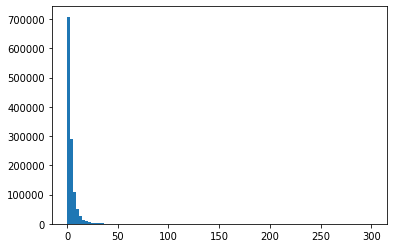

In [44]:
plt.hist(comments_df.likes, bins = 100)

In [47]:
#keep funny wow text vectorized 
# comments_df.rating.replace('rejected', 0, inplace = True)
# comments_df.rating.replace('approved', 1, inplace = True)


In [48]:
comments_df.fillna(value=0, inplace = True)

In [67]:
# comments_df[comments_df.parent_id != 0].parent_id

In [84]:
comments_df[comments_df.rating == 0]


,Unnamed: 0,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,0,haha you guys are a bunch of losers.,2,0,2006,59856,0,0,1,0.0,2015-09-29,10
32,32,0,0,I want to see what happens to spammy comments ...,111,0,32846,240408,0,0,1,0.0,2015-09-29,19
299,299,0,0,OH GREAT ANOTHER PERSON MOVING TO LA TO RUIN T...,6,0,33231,240652,0,0,1,0.0,2016-01-22,21
452,452,0,0,"Perhaps you should spell check, prior to posti...",6,0,34427,241085,0,0,1,1.0,2016-01-28,17
458,458,0,0,"Re: ""In Portland, a group of boaters actually ...",6,0,34877,241107,0,0,1,0.0,2016-01-28,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223426,1223426,0,0,Illegal immigrant praised by anti immigrant co...,21,0,399447,6332176,0,2,0,0.0,2017-11-10,20
1223433,1223433,0,0,Our military and their families love our First...,21,0,399447,6332200,0,0,1,0.0,2017-11-10,20
1223437,1223437,0,0,"However, when Trudeau aired our dirty laundry ...",54,0,399437,6332210,1,2,5,1.0,2017-11-10,20
1223446,1223446,0,0,....said the liberal bootlicker.,102,0,399436,6332242,0,0,1,1.0,2017-11-10,20


(array([91708.,     0., 64189.,     0., 46928.,     0., 35136.,     0.,
        26779., 20506.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <a list of 10 Patch objects>)

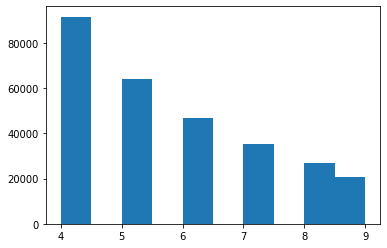

In [79]:
comments_df[comments_df.likes>= 4].likes.describe()
plt.hist(comments_df[(comments_df.likes>= 4) & (comments_df.likes<10)].likes)


,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time


,Unnamed: 0,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,0,haha you guys are a bunch of losers.,2,0,2006,59856,0,0,1,0.0,2015-09-29,10
1,1,0,0,How can the author claim that Star Wars is bet...,22,1,59527,282338,0,0,1,0.0,2015-09-29,16
2,2,0,0,I agree 100% with everything here. Bruce Campb...,111,1,32846,240372,0,0,1,0.0,2015-09-29,16
3,3,0,0,"While I disagree about ""The Phantom Menace,"" t...",111,1,32846,240387,0,0,1,0.0,2015-09-29,16
4,4,0,0,"I agree, but only 99%.",111,1,32846,240373,0,0,1,1.0,2015-09-29,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223653,1223653,0,0,"Marijuana is not medicine, but is an effective...",54,1,399451,6333022,0,0,1,0.0,2017-11-10,22
1223654,1223654,0,0,And another major reason for the deficits: 200...,54,1,399385,6333031,0,0,2,1.0,2017-11-10,22
1223655,1223655,1,0,"Man, I was thinking about becoming a stoner, b...",54,1,399451,6333040,0,0,0,1.0,2017-11-10,22
1223656,1223656,0,0,Sounds like you have a cushy government pension.,54,1,399385,6333055,0,0,1,1.0,2017-11-10,22


In [54]:
# comments_df.to_csv('../cleaned_comments.csv', index = False)

In [3]:
sample_df= comments_df.sample(frac=1/15, random_state=1)


In [4]:
sample_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
sample_df.likes.max()

173

In [ ]:
# pd.get_dummies(sample_df, prefix='created', drop_first = True)

In [14]:
sample_df[sample_df.likes > 50].text.values

array(["Yes it must be a massive conspiracy.  Or it could just be that Trump's lifetime of BS has finally caught up with him.",
       'The handful of posters who keep tying themselves into intellectual knots to defend Donald Trump seem to be ignoring one simple reality. Ultimately this comes down to who do you believe.  So who do you believe - a man who is the former head of the FBI and a former federal prosecutor or a serial liar with a long, proven history of telling fantastic, self-serving stories. If I had to put money on which one of these people will ultimately prevail I think the choice is rather obvious.',
       'It is very troubling that the Supreme Court of Canada now bases its decisions on "social media" noise.\n\nIs this how cases are to be decided henceforth?\n\nIf a Twitter mob can override a SCC decision, and if the SCC can over ride the will of an elected parliament, then going forward we will live under Twitter mobs as the law of the land.\n\nIs this what Canadians w

In [24]:
sample_df[sample_df.likes < 10].text.values

array(["The fact is folks we need to generate revenue to close the budget gap. We have cut the budget and we can't go much lower without even more negative impacts on services.  Now its time to generate revenue and all Alaskans need to have some skin in the game and that means reduced dividend checks and an income or a sales tax. I am glad the legislators are willing to make some hard and unpopular choices for the benefit of our state as a whole.",
       "Just look at Colorado's leftist leadership and their accomplishments, from useless magazine capacity limits, preventing the execution of a mass murderer, protecting foreign criminals, making the police department politically correct, and many others, all of those moves encouraged more crime, so why is this a surprise?",
       'My heart aches for his family. He sounded like an amazing son, brother, friend. Positive thoughts and healing prayers. May his Memory be Eternal',
       ..., 'Ok I admit it. Trump has a secret weather machine

In [17]:
text_length = []
for i in sample_df.text.values:
    text_length.append(len(i))

In [27]:
# sample_df.to_csv('../sample_df.csv', index = False)

In [28]:
# sample_df

In [37]:
len(sample_df[sample_df.likes > 2].likes.values)

34294

In [38]:
len(sample_df[sample_df.likes < 2].likes.values)

33593

In [40]:
sample_df['liked'] = (sample_df.likes > 2)*1

In [46]:
sample_df.likes.max()

173

In [ ]:
#weighting: to fix imbalance (SMOTE)
#add back all zero ratings (DONE)
#try predicting disagreement 
#reevaluate "liked" cutoff 
#explore ratios of likes 

In [64]:
df = pd.read_csv('../../../cleaned_comments.csv')

In [65]:
text_length = []
for i in df.text.values:
    text_length.append(len(i))

In [66]:
df['text_length'] = text_length

In [9]:
hours = []
for h in :
    hours.append(h.hour)

,funny,wow,text,publication_id,rating,article_id,id,sad,created_at,disagree,likes,parent_id,created,text_length
0,0,0,This is such an urgent design problem; kudos t...,2,0,2006,59852,0,2015-09-29 10:50:45.222647+00:00,0,0,0,2015-09-29,86
1,0,0,hahahahahahahahhha suck it.,2,0,2006,59861,0,2015-09-29 10:50:52.451277+00:00,0,0,0,2015-09-29,27
2,0,0,"This is so cool. It's like, 'would you want yo...",2,0,2006,59848,0,2015-09-29 10:50:41.987077+00:00,0,0,0,2015-09-29,101
3,0,0,ur a sh*tty comment.,2,0,2006,59859,0,2015-09-29 10:50:50.865549+00:00,0,0,0,2015-09-29,20
4,0,0,Thank you!! This would make my life a lot less...,2,0,2006,59849,0,2015-09-29 10:50:42.870083+00:00,0,0,0,2015-09-29,114


In [5]:
df['created_at'] = [pd.to_datetime(dt) for dt in df['created_at']]


In [8]:
df['hour'] = [dt.hour for dt in df['created_at']]

In [13]:
df.rating.replace({0: 'Rejected', 1:'Approved'}, inplace = True)

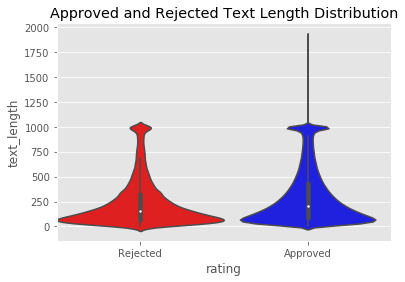

In [61]:
# my_pal = {rating: "b" if rating == "Approved" else "r" for rating in df.rating.unique()}
plt.style.use('ggplot')
sns.violinplot(df.rating ,y = df.text_length, palette=my_pal, width=1)
plt.title('Approved and Rejected Text Length Distribution')
# plt.savefig('../images/violin_rating_txt.png')
plt.show()

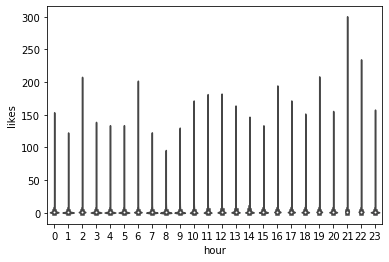

In [10]:
sns.violinplot(df.hour ,y = df.likes)


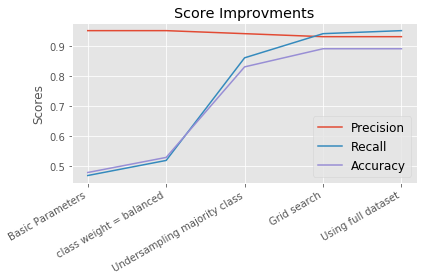

In [58]:
#Random Forest Improvment
labels = ['Basic Parameters', 'class weight = balanced', 'Undersampling majority class', 'Grid search', 'Using full dataset']
accuracies = [0.48, 0.53, 0.83, 0.89, 0.89]
Precision = [0.95,0.95,0.94,0.93,0.93]
Recall = [0.47, 0.52, 0.86, 0.94, 0.95]

plt.style.use('ggplot')
plt.plot(labels,Precision, label = 'Precision')
plt.plot(labels,Recall, label = 'Recall')
plt.plot(labels,accuracies, label = 'Accuracy')
plt.xticks(rotation=30, ha = 'right')
plt.title('Score Improvments')
plt.ylabel('Scores')
plt.legend(prop={'size': 12})
plt.tight_layout()
# plt.savefig('../images/Score_improve.png')
plt.show();

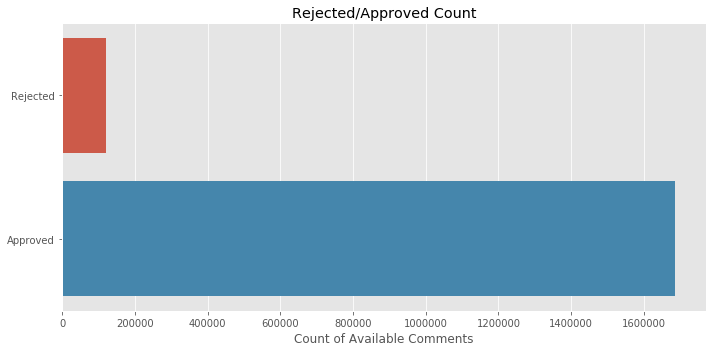

In [78]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, figsize = (10,5))
sns.barplot([120670,1685646],['Rejected','Approved'], ax=ax)
ax.set_xlabel('Count of Available Comments')
plt.title('Rejected/Approved Count')
plt.tight_layout()
plt.savefig('../images/orig_bar.png')
plt.show()

In [68]:
df.rating.value_counts()

1    1685646
0     120670
Name: rating, dtype: int64

In [ ]:
# labels = ['Basic Parameters', 'class weight = balanced', 'Undersampling majority class', 'Grid search', 'Using full dataset']
# accuracies = [0.48, 0.53, 0.83, 0.89, 0.89]
# Precision = [0.95,0.95,0.94,0.93,0.93]
# Recall = [0.47, 0.52, 0.86, 0.94, 0.95]
# AUC = [0.6, 0.6, 0.63, 0.66, ]

# plt.style.use('ggplot')
# plt.plot(labels,Precision, label = 'Precision')
# plt.plot(labels,Recall, label = 'Recall')
# plt.plot(labels,accuracies, label = 'Accuracy')
# plt.xticks(rotation=30, ha = 'right')
# plt.title('Score Improvments')
# plt.ylabel('Scores')
# plt.legend(prop={'size': 12})
# plt.tight_layout()
# # plt.savefig('../images/Score_improve.png')
# plt.show();